# TMA4320 Introduksjon til vitenskapelige beregninger
## Øving 1

**Veiledning**: Tirsdag 16. januar og torsdag 18.januar.

Løsningsforslag vil bli lagt ut en gang i uke 4. 

### Oppgave 1 (Feilsøking og retting. Dokumentasjon).

I denne oppgaven skal du beregne tilnærmelser til integraler ved hjelp av [Simpsons metode](https://wiki.math.ntnu.no/tma4100/tema/numerics?&#numerisk_integrasjon)

\begin{equation}
\int_a^b f(x)\mathrm{d}x \simeq S_{n} = \frac{h}{3}\left( f(x_0)+4\sum_{i=1}^{n/2}f(x_{2i-1}) + 2\sum_{i=1}^{n/2-1} f(x_{2i}) + f(x_{n}) \right)
\end{equation}
der $h=(b-a)/n$, der $n$ må være et like tall, og $x_i=a+ih$.

Under er det et forslag til en kode, skrevet etter prinsippet raskt og gæli. Oppgaven går ut på: 

* Debug koden, både for syntaksfeil og logiske feil. Kan den forbedres på andre måter?
* Skriv den om til en funksjon. Test funksjonen på et passende utvalg med testproblemer. 
* Dokumenter koden. 

Forslag til testproblemer med kjent løsning.

1. $\int_1^2 x^2\mathrm{d}x = 7/3$. I dette tilfellet skal Simpsons formel levere et eksakt resultat. (Hvorfor?)
2. $\int_0^{\pi/2} \sin{x} \mathrm{d}x = 1$. 

Finn gjerne på noen egne testproblemer også. 

**Hint**
* Er det problemer med logiske feil, sett $n=2$, utfør regningene på papir, og sammenlign med hva som skjer i koden. 
* Flytt koden over til Spyder eller en annen IDE, og debug koden der. 

In [40]:
# Eksempel 1
from numpy import sin, pi
def f(x):
    return x**2
a, b = 1, 2
eksakt = 7/3

# Blir eksakt siden simpsons metode baserer seg på andregradspolynom.

In [43]:
# Eksempel 2
def f(x):
    return sin(x)
a, b = 0, pi/2
eksakt = 1.0

In [32]:
# Simpsons metode starter her
def simpsons(n: int, a: float, b: float, f) -> float:
    h = (b-a)/n
    S = 0
    for i in range(1,int(n/2) + 1):
        x = a+(2*i-1)*h
        S += 4*f(x)
    for i in range(1, int(n/2)-1 + 1):
        x = a+2*i*h
        S += 2*f(x)
    S = S + f(b) + f(a)
    S = h*S/3
    return S

def simpsons_v2(n: int, a: float, b: float, f) -> float:
    h = (b-a)/n
    S = 0
    for i in range(1, n, 2):
        x1 = a+i*h  # Odd indicies
        x2 = a+(i+1)*h  # Even indices
        
        S += 4*f(x1)
        S += 2*f(x2)
    S += f(a) - f(b)  # Vi have counted f(b) twice in the loop, but we only need one
    return S*h/3

S = simpsons_v2(2, a, b, f)
feil = abs(S-eksakt)
print(f'S = {S:.4f}, feil = {feil:.3e}')
    

S = 2.3333, feil = 0.000e+00


### Oppgave 2 (Numpy)

Implementer Simpsons metode igjen, men denne gangen ved bruk av numpy. For eksempel ved: 
* Lag et array av gridpunktene $\{x_i\}_{i=0}^n$ ved bruk av <tt>np.linspace</tt>
* For de to summene i uttrykket for Simpson's metode: Plukk ut de riktige gridpunktene $x_i$, finn funksjonsverdien av disse, og bruk <tt>np.sum</tt>. 
* Legg til funksjonsverdiene i de to endepunktene, multipliser med $h/3$.  

In [46]:
import numpy as np


def simpsons_numpy(n: int, a: float, b: float, f) -> float:
    xs = np.linspace(a, b, n+1)  # Vi bruker én verdi mer enn n siden vi starter på indeks 0
    h = xs[1] - xs[0]
    xs = f(xs)
    xs[1:-1:2] *= 4
    xs[2:-1:2] *= 2
    return float(np.sum(xs))*h/3

S = simpsons_numpy(100, a, b, f)
feil = abs(S-eksakt)
print(f'S = {S:.4f}, feil = {feil:.3e}')

S = 1.0000, feil = 3.382e-10


### Oppgave 3 (Bruk av biblioteksrutiner)
_Uten løsningsforslag_

Gitt funksjonen
\begin{equation}
f(x) = \frac{1}{(x-5)^2+0.2} + \frac{1}{(x-2)^2+0.05} + 2.
\end{equation}

* Plot funksjonen over intervallet $[-2,8]$.
* Finn en tilnærmelse til integralet $\int_{-2}^8f(x)\mathrm{d}x$ ved bruk av <tt>scipy.integrate.quad</tt>.  
  
  **Hint!** Les dokumentasjonen. Bla fram til eksemplene.

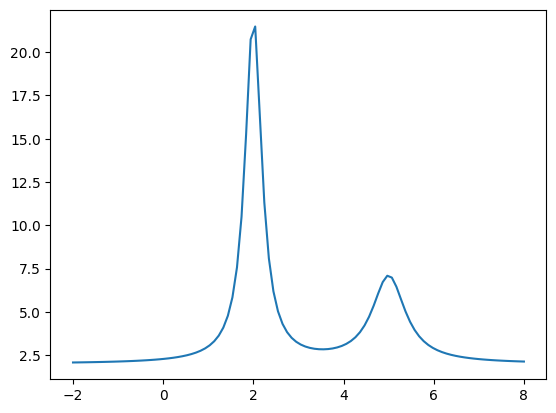

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def g(xs: np.ndarray) -> np.ndarray:
    return 1/((xs-5)**2 + 0.2) + 1/((xs-2)**2 + 0.05) + 2

a, b = -2, 8
xs = np.linspace(a, b, 100)
ys = g(xs)
plt.plot(xs, ys)
plt.show()

In [51]:
from scipy.integrate import quad

res = quad(g, a, b)
print(f"Integral: {res[0]: .4f}\nError: {res[1]: .3e}")

Integral:  40.1846
Error:  2.652e-08


### Oppgave 4 (Kompleksitet. Effektiv bruk av Numpy)

La $A,B\in \mathbb{R}^{n \times n}$. Produktet $C=AB$ regnes ut ved følgende algoritme:

$$
\text{for } i=1,\cdots,n \\
\qquad \text{for } j=1,\cdots,n \\
\qquad \qquad c_{ij} = \sum_{k=1}^n a_{ik} b_{kj}. 
$$
 
**a)**

Hvor mange flyttallsoperasjoner krever en slik matrise-matrise multiplikasjon av to $n\times n$-matriser? 

Poenget med resten av denne oppgaven er hovedsaklig å vise hvor effektive Pythons innebygde rutiner for lineær algebra er. 

**b)** Skriv din egen rutine for å regne ut matrise-matrise produktet $C=BA$ med algoritmen over. 

Deretter: Velg $n$. Lag to tilfeldige $n\times n$-matriser $A$ og $B$. Regn ut $C=AB$ med din egen rutine. Ta tiden. Sammenlign med den tiden det tar å gjøre samme operasjon med pythons multiplikasjonsoperator `@` eller `np.dot`. 

Gjenta gjerne eksperimentet med din egen `gauss_pivot` og `np.linalg.solve`. Velg høyreside selv. 

In [62]:
# n**2*(n+(n-1)) = n**2*(2n-1)
# O(n**3)

def mult(A: list[list[float]],B: list[list[float]]) -> list[list[float]]:
    ''' 
    Regner ut matrise-matrise produktet C=AB. A, B er n*x matriser.
    '''
    n = len(A)
    C: list[list[float]] = [[0 for j in range(0, n)] for i in range(0, n)]
    for i in range(0, n):
        for j in range(0, n):
            for k in range(0, n):
                C[i][j] += A[i][k]*B[k][j]
    return C




In [64]:
# Lag matrisene
n = 100
A = np.random.randn(n,n)
B = np.random.randn(n,n)

# Test egen kode:
import time
B_list = list(B)
A_list = list(A)
tstart = time.time()
C = mult(A_list,B_list)
print(f'Min kode bruker     {time.time()-tstart:.3e} s')

# Test pythons kode
tstart = time.time()
C = A@B
print(f'Pyhtons kode bruker {time.time()-tstart:.3e} s')

Min kode bruker     2.105e-01 s
Pyhtons kode bruker 1.314e-04 s


In [65]:
# Alternativ (og mer nøyaktig metode) for å måle tidsbruk:

%timeit mult(A,B)
%timeit A@B

355 ms ± 3.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
64.6 µs ± 487 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Oppgave 5 (Feilanalyse og testing)
_Uten løsningsforslag_

Gitt følgende metode for å tilnærme $f''(x_0)$ for en gitt funksjon $f$:

$$
\begin{equation}
f''(x_0) = \frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2} + e(h).
\end{equation}
$$
Du kan anta at $h>0$. 

**a)** Finn et uttrykk for feilen $e(h)$. Hvilke betingelser settes på $f$ for at uttrykket skal være gyldig?

**b)** Test teorien numerisk. Velg selv testproblemer. 


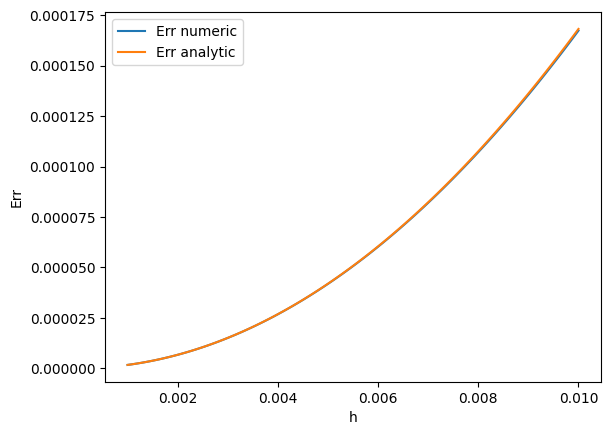

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x: np.ndarray) -> np.ndarray:
    return np.exp(x)

def err_dd_f(x: float, h: np.ndarray) -> np.ndarray:
    dd_f = (f(x+h) - 2*f(np.full_like(h, x)) + f(x-h))/h**2
    return np.abs(dd_f - np.exp(x))

x = 3
h = np.linspace(1e-3, 1e-2, 100)
err = err_dd_f(x, h)
err_analytic = lambda x, h: (np.exp(x+h)+np.exp(x))*h**2/24

plt.plot(h, err, label="Err numeric")
plt.plot(h, err_analytic(x, h), label="Err analytic")
plt.legend()
plt.xlabel("h")
plt.ylabel("Err")
plt.show()
